In the first part, the focus will be on learning with a generalised delta rule for a two-layer perceptron. The generalised delta rule is also known as the error back-propagation algorithm or simply "backprop".

## MLP Implementation

-------------

In [9]:
import numpy as np

check the e!!!

In [10]:
# e = 2.718281828459045
# class TwoLayerPerceptron:
#     def __init__(self, learning_rate, n_hidden, mean=0.0, std_dev=1.0):
#         self.W = np.random.randn(n_hidden, 3) * std_dev + mean
#         self.V = np.random.randn(1, n_hidden) * std_dev + mean      
#         # self.W = np.ones((n_hidden, 3))
#         # self.W = np.ones((n_hidden, 3))
#         # self.V = np.ones((1, n_hidden))

#         # self.V = np.ones((1, n_hidden))
#         self.learning_rate = learning_rate
#         self.epochs = 0

#     def activation_function(self, input):
#         denominator = 1 + np.power(e, (-1) * input)

#         eps = 0.0001
        
#         denominator = np.clip(denominator, eps, None)
        
#         return (2 / denominator) - 1
    
#     def grad(self, input):
#         act_input = self.activation_function(input)
#         return ((1 + act_input)*(1 - act_input) / 2)
    
#     def backprop_update(self, x, t):
#         # forward pass
#         hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)
#         hout = self.activation_function(hin)                # (n_hidden, n_samples)

#         oin = self.V @ hout                                 # (1, n_hidden) x (n_hidden, n_samples) =
#         out = self.activation_function(oin)                 # (1, n_samples)
        
#         # backward pass
#         delta_o = (out - t) * self.grad(oin)                # element-wise product -> (1, n_samples)
#         delta_h = (self.V.T @ delta_o) * self.grad(hin)     # (n_hidden, 1) x (1, n_samples) = (n_hidden, n_samples)
#         delta_h = delta_h[1,:]                              # togli bias


#         # weight update
#         dW = (-1) * self.learning_rate * (delta_h @ x.T)    # (n_hidden, n_samples) x (n_samples, 3) = (n_hidden, 3)
#         dV = (-1) * self.learning_rate * (delta_o @ hout.T)   # (1, n_samples) x (n_samples, n_hidden) = (1, n_hidden)

#         self.W += dW
#         self.V += dV
    
#     def fit(self, x, t, n_epochs):
#         for _ in range(n_epochs):
#             self.backprop_update(x, t)
#             self.epochs += 1

#     def predict(self, x):
#         # forward pass
#         hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)
#         hout = self.activation_function(hin)                # (n_hidden, n_samples)

#         oin = self.V @ hout                                 # (1, n_hidden) x (n_hidden, n_samples) =
#         out = self.activation_function(oin)                 # (1, n_samples)

#         return out

In [11]:
from math import e
class TwoLayerPerceptron:
    def __init__(self, learning_rate, n_hidden, mean=0.0, std_dev=1.0):
        self.W = np.random.randn(n_hidden, 2 + 1) * std_dev + mean
        self.V = np.random.randn(1, n_hidden + 1) * std_dev + mean          # un peso per input layer, +1 per il bias!!  
        # self.W = np.ones((n_hidden, 2+1))
        # self.V = np.ones((1, n_hidden+1))

        self.learning_rate = learning_rate
        self.epochs = 0

    def activation_function(self, input):
        denominator = 1 + np.power(1/e, input)
        
        return (2 / denominator) - 1
    
    def grad(self, input):
        act_input = self.activation_function(input)
        return ((1 + act_input)*(1 - act_input) / 2)
    
    def backprop_update(self, x, t):
        # forward pass
        hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)  [x ha già il bias]
        hout = self.activation_function(hin)                # (n_hidden, n_samples)
        hout = np.vstack((np.ones(hout.shape[1]), hout))    # (n_hidden + 1, n_samples)

        oin = self.V @ hout                                 # (1, n_hidden + 1) x (n_hidden + 1, n_samples) = (1, n_samples)
        out = self.activation_function(oin)                 # (1, n_samples)
        
        # backward pass
        delta_o = (out - t) * self.grad(oin)                # element-wise product -> (1, n_samples)
        delta_h = (self.V.T @ delta_o) * self.grad(hout)     # (n_hidden + 1, 1) @ (1, n_samples) * (n_hidden, n_samples) = (n_hidden + 1, n_samples)
        delta_h = delta_h[1:,:]                              # togli bias -> (n_hidden, n_samples)


        # weight update
        dW = (-1) * self.learning_rate * (delta_h @ x.T)      # ((n_hidden, n_samples) @ (n_samples, 3)) = (n_hidden, 3)
        dV = (-1) * self.learning_rate * (delta_o @ hout.T)   # (1, n_samples) x (n_samples, n_hidden) = (1, n_hidden)

        self.W += dW
        self.V += dV
    
    def fit(self, x, t, n_epochs):
        for _ in range(n_epochs):
            self.backprop_update(x, t)
            self.epochs += 1

    def predict(self, x):
        # forward pass
        hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)
        hout = self.activation_function(hin)                # (n_hidden, n_samples)
        hout = np.vstack((np.ones(hout.shape[1]), hout))    # (n_hidden + 1, n_samples)


        oin = self.V @ hout                                 # (1, n_hidden) x (n_hidden, n_samples) =
        out = self.activation_function(oin)                 # (1, n_samples)

        return out

### Part 3.1.1 - Classification of linearly non-separable data

The goal is to examine how well a two-layer perceptron trained with backprop performs in separating the two classes.

-----------

In [12]:
import numpy as np

ndata = 100
# mA = np.array([1.0, 0.3])
mA = np.array([1.0, 0.3])

sigmaA = 0.3
mB = np.array([0.0, -0.1])
sigmaB = 0.2

# Generating data for class A
half_ndata = int(0.5 * ndata)
classA = np.zeros((2, ndata))
classA[0, :half_ndata] = np.random.randn(half_ndata) * sigmaA - mA[0]
classA[1, :half_ndata] = np.random.randn(half_ndata) * sigmaA + mA[1]
classA[0, half_ndata:] = np.random.randn(half_ndata) * sigmaA + mA[0]
classA[1, half_ndata:] = np.random.randn(half_ndata) * sigmaA + mA[1]

# Generating data for class B
classB = np.zeros((2, ndata))
classB[0, :] = np.random.randn(ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(ndata) * sigmaB + mB[1]

In [13]:
classA = np.vstack((classA, - np.ones(ndata)))
classB = np.vstack((classB, np.ones(ndata)))

In [14]:
classA[:,:5]

array([[-0.61278926, -1.18514751, -0.77383108, -0.49715414, -1.03706394],
       [ 0.64535523,  0.3818709 ,  0.59905819,  0.08140414, -0.02644429],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [15]:
classB[:,:5]

array([[-0.05994441, -0.11203793, -0.00338444, -0.56669286,  0.07463117],
       [-0.11597238, -0.37411952, -0.20840055, -0.04417328, -0.41944196],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

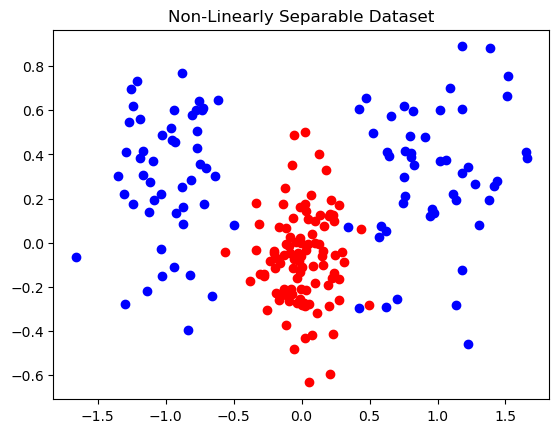

In [16]:
import matplotlib.pyplot as plt
plt.title("Non-Linearly Separable Dataset")
plt.scatter(classA[0,:], classA[1,:], c='b', label='a', marker='o')
plt.scatter(classB[0,:], classB[1,:], c='r', label='b', marker='o')
plt.show()

### Experiment 1:
Modify the number of hidden nodes and demonstrate the effect the size of the hidden layer has on the performance (both the mean squared error and the number/ratio of misclassifications). How many hidden nodes do you need to perfectly separate all the available data (if manageable at all given your data randomisation)?

---------------

bias

In [87]:
dataset = np.vstack((np.ones(2*ndata), np.hstack((classA, classB))))
dataset[:, :5]

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [-1.45723912e+00, -8.27654766e-01, -9.75782544e-01,
        -8.38867251e-01, -1.05482559e+00],
       [ 4.36414831e-01, -4.95096692e-07,  2.58732229e-01,
         8.94290184e-01,  4.99433236e-02],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00]])

shuffle

In [88]:
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:, :5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.078461  , -0.01407356,  0.16865135,  0.02645474,  0.40920793],
       [-0.29395666, -0.00206617, -0.2048657 ,  0.07563374, -0.20022471],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

split

In [89]:
X_train = dataset[:3,:]
y_train = dataset[3,:]

*Let's try with 4 hidden layers*

In [90]:
perceptron_classifier = TwoLayerPerceptron(0.005, 2)

In [91]:
mse = []
accuracies = []

In [92]:
perceptron_classifier.epochs

0

In [96]:
for _ in range(250):
    perceptron_classifier.fit(X_train, y_train, 1)
    p = perceptron_classifier.predict(X_train)

    # MSE
    mse.append(np.sum((y_train - p)**2 / len(y_train)))

    # accuracy
    predictions = 2*(np.array(p > 0, dtype=int)) - 1
    accuracies.append(np.sum(predictions == y_train) / len(y_train))

perceptron_classifier.epochs

500

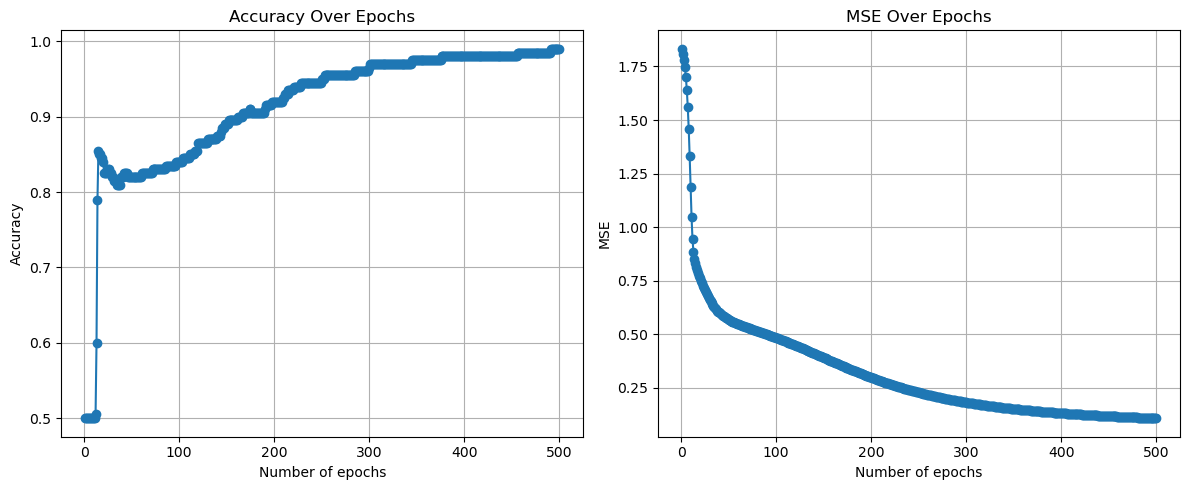

In [97]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
x_values = range(1, len(accuracies) + 1)
ax1.plot(x_values, accuracies, marker='o', linestyle='-')
ax1.set_xlabel('Number of epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.grid(True)

# Plot the second graph
x_values = range(1, len(mse) + 1)
ax2.plot(x_values, mse, marker='o', linestyle='-')
ax2.set_xlabel('Number of epochs')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Over Epochs')
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


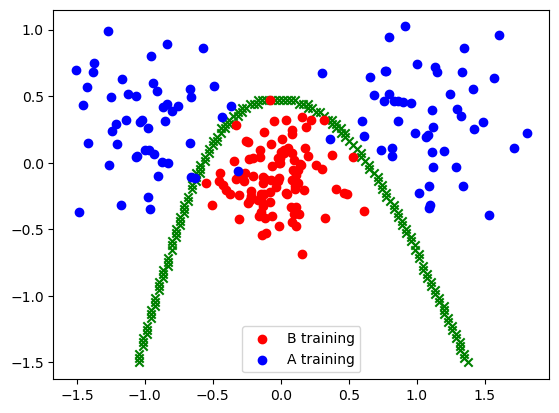

In [98]:
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)

eps = 0.05
boundary = []

for xp in x:
    for yp in y:
        p = np.array((1,xp,yp)).reshape((3, 1))
        point_prediction = perceptron_classifier.predict(p)

        if (point_prediction < eps and point_prediction > -eps):
            boundary.append(p)
        
for p in boundary:
    plt.scatter(p[1], p[2], c='g', marker='x')

neg = y_train == -1
pos = y_train == +1

plt.scatter(X_train[1, pos], X_train[2,pos], c='r', label='B training', marker='o')
plt.scatter(X_train[1, neg], X_train[2, neg], c='b', label='A training', marker='o')

plt.legend()

plt.show()

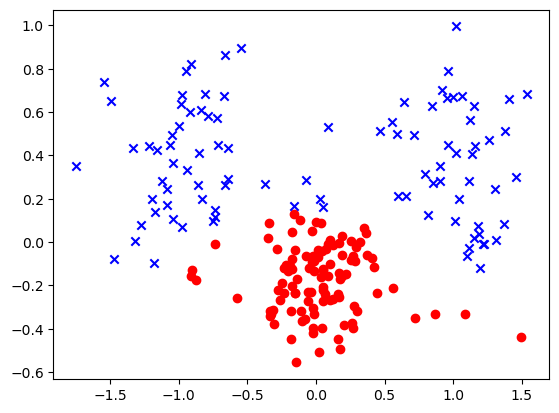

In [18]:
p = perceptron_classifier.predict(X_train)
predictions = 2*(np.array(p > 0, dtype=int)) - 1

pred_pos = (predictions == 1)
pred_neg = (predictions == -1)

plt.scatter(X_train[1, pred_pos[0,:]], X_train[2, pred_pos[0,:]], c='r', label='a', marker='o')
plt.scatter(X_train[1, pred_neg[0,:]], X_train[2, pred_neg[0,:]], c='b', label='b', marker='x')

plt.show()

*How many hidden nodes do we need to perfectly classify all the points?*

In [19]:
final_accuracies = []
final_mse = []
for n in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    pc = TwoLayerPerceptron(0.005, n)
    for _ in range(400):
        pc.fit(X_train, y_train, 1)
    p = pc.predict(X_train)
    
    predictions = 2*(np.array(p > 0, dtype=int)) - 1

    final_accuracies.append(np.sum(predictions == y_train) / len(y_train))
    final_mse.append(np.sum((y_train - p)**2 / len(y_train)))


print(final_accuracies)
print(final_mse)

[0.97, 0.945, 0.83, 0.975, 0.91, 0.955, 0.97, 0.96, 0.945]
[0.16432092275047472, 0.20662049672948724, 0.48862311808340725, 0.13447138082315813, 0.2972189838032341, 0.20112956078652375, 0.15457413403019082, 0.18200098405748344, 0.2137004344389909]


ANSWER: it looks like there is no right number of hidden nodes to correctly classify all the points generated: the answer depends mostly on the dataset (at least with so limited amount of samples). Also we should monitor training more accurately in order to have guarantees convergence is reached.

### Experiment 2:
Then, formulate a more realistic problem where only a subset of data points is available for training a network (data you use to calculate weight updates using backprop) and the remaining samples constitute a validation dataset for probing generalisation capabilites of the network. To do that, subsample the data for training according to the following scenarios:
- random 25% from each class
- random 50% from class A
- 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

Treat the removed samples as a validation set. Make sure you do not use this hold-out set in the training process and instead you only use it to
calculate the error (mean squared error or the ratio of misclassifications) at different stages/epochs of learning to monitor the progress.

#### Scenario 1

------------

In [20]:
classA_train = classA[:,:75]
classA_holdout = classA[:,75:]

classB_train = classB[:,:75]
classB_holdout = classB[:,75:]

classA_train.shape, classA_holdout.shape, classB_train.shape, classB_holdout.shape

((3, 75), (3, 25), (3, 75), (3, 25))

In [21]:
train = np.vstack((np.ones(150), np.hstack((classA_train, classB_train))))
rng.shuffle(train, axis=1)
X_train = train[:3, :]
y_train = train[3, :]

holdout = np.vstack((np.ones(50), np.hstack((classA_holdout, classB_holdout))))
rng.shuffle(holdout, axis=1)
X_holdout = holdout[:3, :]
y_holdout = holdout[3, :]

X_train.shape, y_train.shape, X_holdout.shape, y_holdout.shape

((3, 150), (150,), (3, 50), (50,))

In [22]:
size_hidden = 8

In [23]:
perceptron_classifierZ = TwoLayerPerceptron(0.005, size_hidden)

#### Training + Validation error

In [24]:
mse_train = []
accuracies_train = []

mse_validation = []
accuracies_validation = []


In [25]:
for _ in range(500):
    perceptron_classifierZ.fit(X_train, y_train, 1)

    p_train = perceptron_classifierZ.predict(X_train)
    p_validation = perceptron_classifierZ.predict(X_holdout)

    # if (e % 50 == 0):
    #     print(np.sum(np.array(p_validation > 0, dtype=int)))

    # MSE
    mse_train.append(np.sum((y_train - p_train)**2 / len(y_train)))
    mse_validation.append(np.sum((y_holdout - p_validation)**2 / len(y_holdout)))

    # accuracy
    predictions_train = 2*(np.array(p_train > 0, dtype=int)) - 1
    accuracies_train.append(np.sum(predictions_train == y_train) / len(y_train))

    predictions_validation = 2*(np.array(p_validation > 0, dtype=int)) - 1
    accuracies_validation.append(np.sum(predictions_validation == y_holdout) / len(y_holdout))

accuracy_1 = accuracies_validation[len(accuracies_validation)-1]

In [26]:
len(accuracies_train), len(accuracies_validation)

(500, 500)

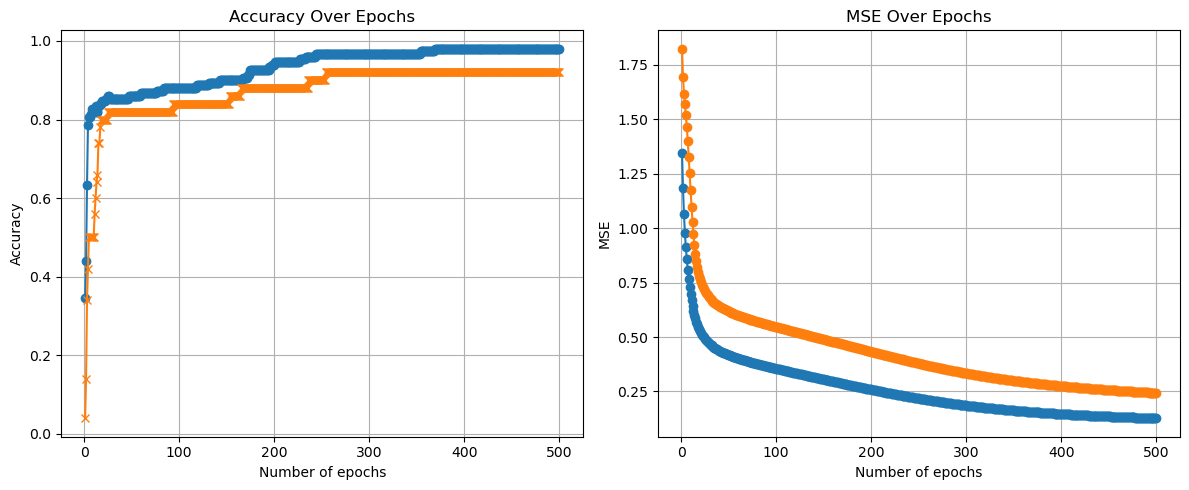

In [27]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
x_values = range(1, len(accuracies_train) + 1)
ax1.plot(x_values, accuracies_train, marker='o', linestyle='-')
ax1.plot(x_values, accuracies_validation, marker='x', linestyle='-')
ax1.set_xlabel('Number of epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.grid(True)

# Plot the second graph
x_values = range(1, len(mse_train) + 1)
ax2.plot(x_values, mse_train, marker='o', linestyle='-')
ax2.plot(x_values, mse_validation, marker='o', linestyle='-')
ax2.set_xlabel('Number of epochs')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Over Epochs')
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

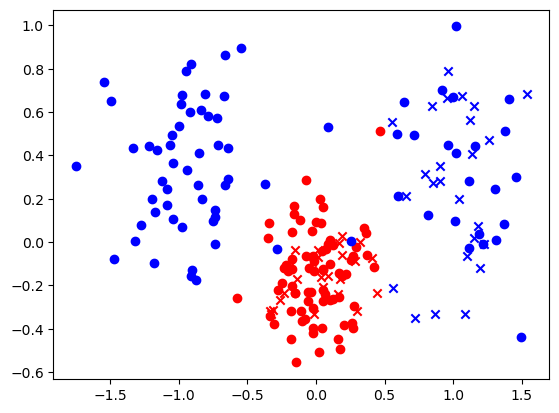

In [28]:
neg = y_train == -1
pos = y_train == +1

plt.scatter(X_train[1, pos], X_train[2,pos], c='r', label='a', marker='o')
plt.scatter(X_train[1, neg], X_train[2, neg], c='b', label='b', marker='o')


neg = y_holdout == -1
pos = y_holdout == +1

plt.scatter(X_holdout[1, pos], X_holdout[2,pos], c='r', label='a', marker='x')
plt.scatter(X_holdout[1, neg], X_holdout[2, neg], c='b', label='b', marker='x')


plt.show()

In [29]:
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)

eps = 0.05
boundary = []

for xp in x:
    for yp in y:
        p = np.array((1,xp,yp)).reshape((3, 1))
        point_prediction = perceptron_classifierZ.predict(p)

        if (point_prediction < eps and point_prediction > -eps):
            boundary.append(p)
        
len(boundary)

143

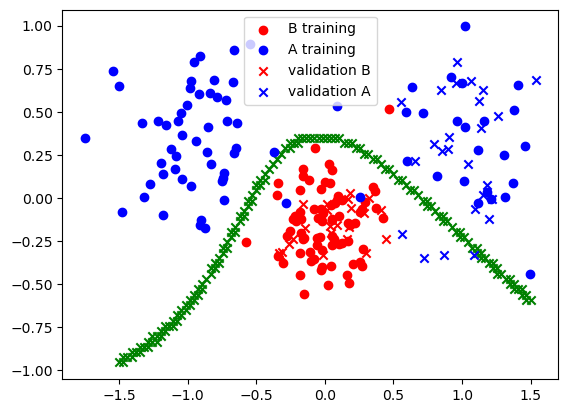

In [30]:
for p in boundary:
    plt.scatter(p[1], p[2], c='g', marker='x')

neg = y_train == -1
pos = y_train == +1

plt.scatter(X_train[1, pos], X_train[2,pos], c='r', label='B training', marker='o')
plt.scatter(X_train[1, neg], X_train[2, neg], c='b', label='A training', marker='o')

neg = y_holdout == -1
pos = y_holdout == +1

plt.scatter(X_holdout[1, pos], X_holdout[2,pos], c='r', label='validation B', marker='x')
plt.scatter(X_holdout[1, neg], X_holdout[2, neg], c='b', label='validation A', marker='x')

plt.legend()

plt.show()

#### Scenario 2

---------------

In [31]:
rng.shuffle(classA, axis=1)

classA_train = classA[:,:50]
classA_holdout = classA[:,50:]

classB_train = classB[:,:100]
classB_holdout = []

classA_train.shape, classA_holdout.shape, classB_train.shape

((3, 50), (3, 50), (3, 100))

In [32]:
train = np.vstack((np.ones(150), np.hstack((classA_train, classB_train))))
rng.shuffle(train, axis=1)
X_train = train[:3, :]
y_train = train[3, :]

holdout = np.vstack((np.ones(50), classA_holdout))
rng.shuffle(holdout, axis=1)
X_holdout = holdout[:3, :]
y_holdout = holdout[3, :]

X_train.shape, y_train.shape, X_holdout.shape, y_holdout.shape

((3, 150), (150,), (3, 50), (50,))

In [33]:
perceptron_classifierZ = TwoLayerPerceptron(0.005, size_hidden)

In [34]:
mse_train = []
accuracies_train = []

mse_validation = []
accuracies_validation = []


In [35]:
for _ in range(500):
    perceptron_classifierZ.fit(X_train, y_train, 1)

    p_train = perceptron_classifierZ.predict(X_train)
    p_validation = perceptron_classifierZ.predict(X_holdout)

    # if (e % 50 == 0):
    #     print(np.sum(np.array(p_validation > 0, dtype=int)))

    # MSE
    mse_train.append(np.sum((y_train - p_train)**2 / len(y_train)))
    mse_validation.append(np.sum((y_holdout - p_validation)**2 / len(y_holdout)))

    # accuracy
    predictions_train = 2*(np.array(p_train > 0, dtype=int)) - 1
    accuracies_train.append(np.sum(predictions_train == y_train) / len(y_train))

    predictions_validation = 2*(np.array(p_validation > 0, dtype=int)) - 1
    accuracies_validation.append(np.sum(predictions_validation == y_holdout) / len(y_holdout))

accuracy_2 = accuracies_validation[len(accuracies_validation)-1]

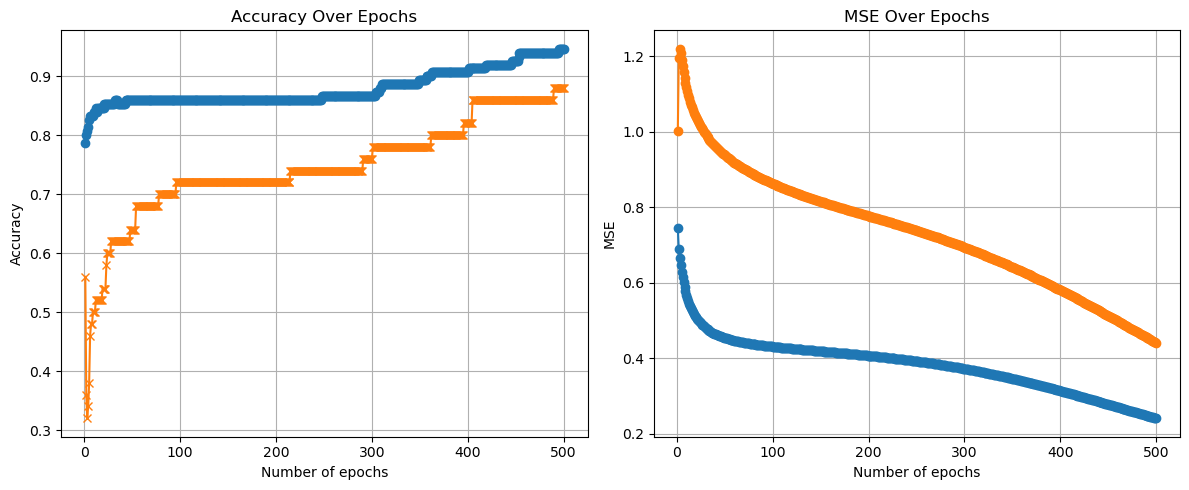

In [36]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
x_values = range(1, len(accuracies_train) + 1)
ax1.plot(x_values, accuracies_train, marker='o', linestyle='-')
ax1.plot(x_values, accuracies_validation, marker='x', linestyle='-')
ax1.set_xlabel('Number of epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.grid(True)

# Plot the second graph
x_values = range(1, len(mse_train) + 1)
ax2.plot(x_values, mse_train, marker='o', linestyle='-')
ax2.plot(x_values, mse_validation, marker='o', linestyle='-')
ax2.set_xlabel('Number of epochs')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Over Epochs')
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [37]:
X_train.shape

(3, 150)

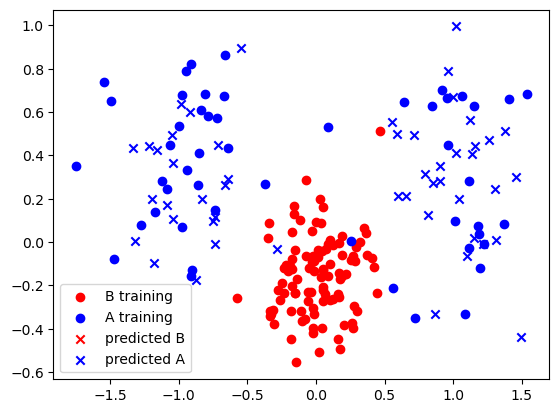

In [38]:
neg = y_train == -1
pos = y_train == +1

plt.scatter(X_train[1, pos], X_train[2,pos], c='r', label='B training', marker='o')
plt.scatter(X_train[1, neg], X_train[2, neg], c='b', label='A training', marker='o')

neg = y_holdout == -1
pos = y_holdout == +1

plt.scatter(X_holdout[1, pos], X_holdout[2,pos], c='r', label='predicted B', marker='x')
plt.scatter(X_holdout[1, neg], X_holdout[2, neg], c='b', label='predicted A', marker='x')

plt.legend()

plt.show()

In [39]:
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)

eps = 0.05
boundary = []

for xp in x:
    for yp in y:
        p = np.array((1,xp,yp)).reshape((3, 1))
        point_prediction = perceptron_classifierZ.predict(p)

        if (point_prediction < eps and point_prediction > -eps):
            boundary.append(p)
        
len(boundary)

115

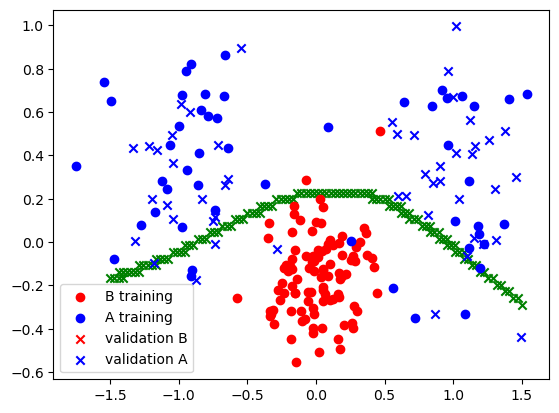

In [40]:
for p in boundary:
    plt.scatter(p[1], p[2], c='g', marker='x')

neg = y_train == -1
pos = y_train == +1

plt.scatter(X_train[1, pos], X_train[2,pos], c='r', label='B training', marker='o')
plt.scatter(X_train[1, neg], X_train[2, neg], c='b', label='A training', marker='o')

neg = y_holdout == -1
pos = y_holdout == +1

plt.scatter(X_holdout[1, pos], X_holdout[2,pos], c='r', label='validation B', marker='x')
plt.scatter(X_holdout[1, neg], X_holdout[2, neg], c='b', label='validation A', marker='x')

plt.legend()

plt.show()

### Scenario 3

----------------

In [41]:
rng.shuffle(classA, axis=1)

a_less_zero = classA[:, classA[0, :] < 0]
a_more_zero = classA[:, classA[0, :] >= 0]
a_less_zero.shape, a_more_zero.shape

((3, 50), (3, 50))

In [42]:
classA_train = np.hstack((a_less_zero[:, :40], a_more_zero[:, :10]))
classA_holdout = np.hstack((a_less_zero[:, 40:], a_more_zero[:, 10:]))
classA_train.shape, classA_holdout.shape

((3, 50), (3, 50))

In [43]:
classB_train = classB

In [44]:
train = np.vstack((np.ones(150), np.hstack((classA_train, classB_train))))
rng.shuffle(train, axis=1)
X_train = train[:3, :]
y_train = train[3, :]

holdout = np.vstack((np.ones(50), classA_holdout))
rng.shuffle(holdout, axis=1)
X_holdout = holdout[:3, :]
y_holdout = holdout[3, :]

X_train.shape, y_train.shape, X_holdout.shape, y_holdout.shape

((3, 150), (150,), (3, 50), (50,))

In [45]:
perceptron_classifierZ = TwoLayerPerceptron(0.001, size_hidden)

In [46]:
mse_train = []
accuracies_train = []

mse_validation = []
accuracies_validation = []

In [47]:
for _ in range(500):
    perceptron_classifierZ.fit(X_train, y_train, 1)

    p_train = perceptron_classifierZ.predict(X_train)
    p_validation = perceptron_classifierZ.predict(X_holdout)

    # if (e % 50 == 0):
    #     print(np.sum(np.array(p_validation > 0, dtype=int)))

    # MSE
    mse_train.append(np.sum((y_train - p_train)**2 / len(y_train)))
    mse_validation.append(np.sum((y_holdout - p_validation)**2 / len(y_holdout)))

    # accuracy
    predictions_train = 2*(np.array(p_train > 0, dtype=int)) - 1
    accuracies_train.append(np.sum(predictions_train == y_train) / len(y_train))

    predictions_validation = 2*(np.array(p_validation > 0, dtype=int)) - 1
    accuracies_validation.append(np.sum(predictions_validation == y_holdout) / len(y_holdout))

accuracy_3 = accuracies_validation[len(accuracies_validation)-1]

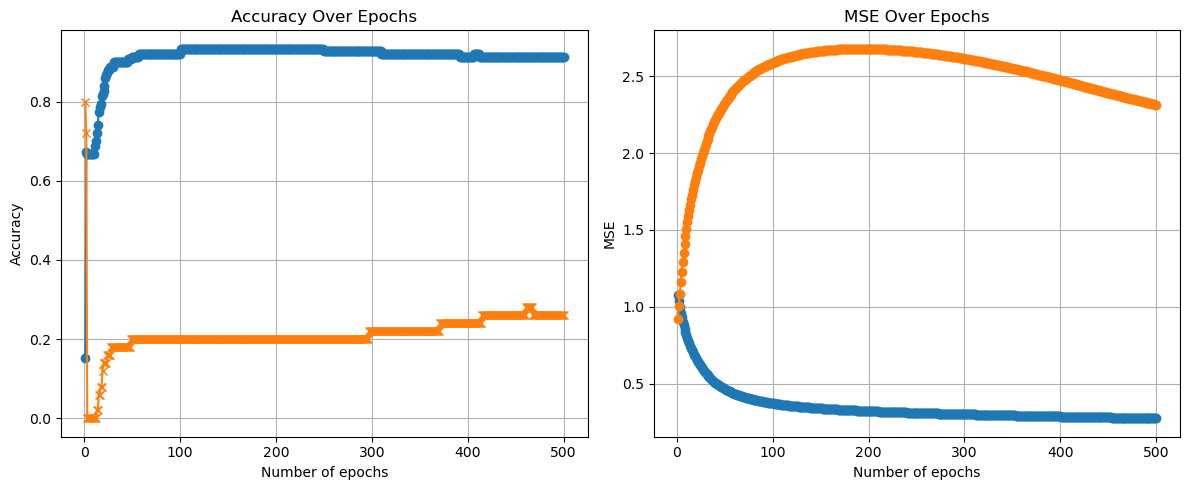

In [48]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
x_values = range(1, len(accuracies_train) + 1)
ax1.plot(x_values, accuracies_train, marker='o', linestyle='-')
ax1.plot(x_values, accuracies_validation, marker='x', linestyle='-')
ax1.set_xlabel('Number of epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.grid(True)

# Plot the second graph
x_values = range(1, len(mse_train) + 1)
ax2.plot(x_values, mse_train, marker='o', linestyle='-')
ax2.plot(x_values, mse_validation, marker='o', linestyle='-')
ax2.set_xlabel('Number of epochs')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Over Epochs')
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

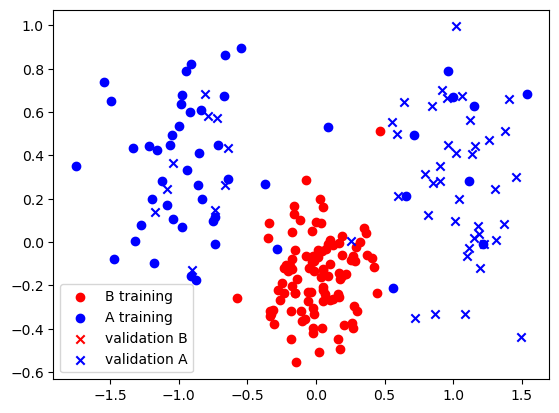

In [49]:
neg = y_train == -1
pos = y_train == +1

plt.scatter(X_train[1, pos], X_train[2,pos], c='r', label='B training', marker='o')
plt.scatter(X_train[1, neg], X_train[2, neg], c='b', label='A training', marker='o')

neg = y_holdout == -1
pos = y_holdout == +1

plt.scatter(X_holdout[1, pos], X_holdout[2,pos], c='r', label='validation B', marker='x')
plt.scatter(X_holdout[1, neg], X_holdout[2, neg], c='b', label='validation A', marker='x')

plt.legend()

plt.show()

#### Trying to plot the boundary

In [50]:
p = np.array((1,4,5))
perceptron_classifierZ.predict(p.reshape((3,1)))

array([[-0.99872209]])

In [51]:
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)

eps = 0.05
boundary = []

for xp in x:
    for yp in y:
        p = np.array((1,xp,yp)).reshape((3, 1))
        point_prediction = perceptron_classifierZ.predict(p)

        if (point_prediction < eps and point_prediction > -eps):
            boundary.append(p)
        
len(boundary)

124

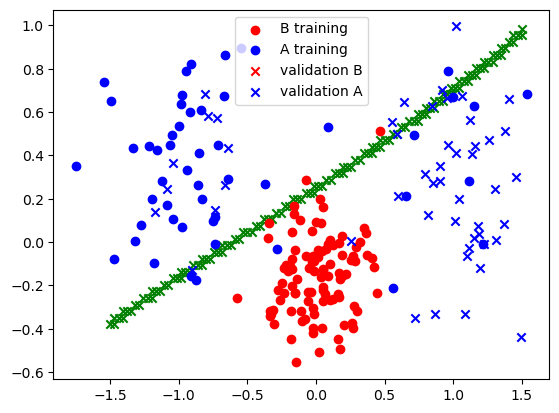

In [52]:
for p in boundary:
    plt.scatter(p[1], p[2], c='g', marker='x')

neg = y_train == -1
pos = y_train == +1

plt.scatter(X_train[1, pos], X_train[2,pos], c='r', label='B training', marker='o')
plt.scatter(X_train[1, neg], X_train[2, neg], c='b', label='A training', marker='o')

neg = y_holdout == -1
pos = y_holdout == +1

plt.scatter(X_holdout[1, pos], X_holdout[2,pos], c='r', label='validation B', marker='x')
plt.scatter(X_holdout[1, neg], X_holdout[2, neg], c='b', label='validation A', marker='x')

plt.legend()

plt.show()

-----------------

In [53]:
print(accuracy_1, accuracy_2, accuracy_3)

0.92 0.88 0.26


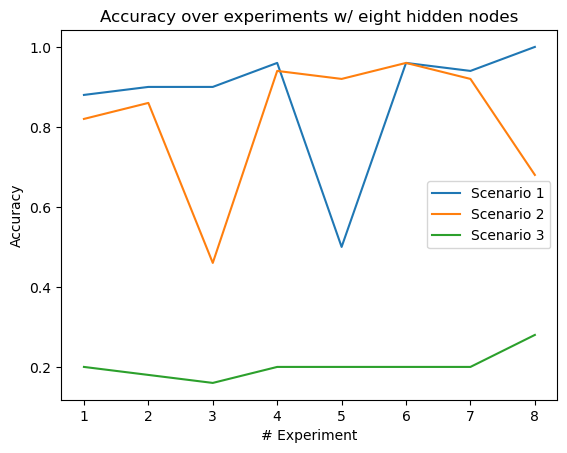

In [54]:
x_values = range(1, 9)

# stochasticity of training

data_8_nodes = [[0.88, 0.82, 0.2],
        [0.9, 0.86, 0.18],
        [0.9, 0.46, 0.16],
        [0.96, 0.94, 0.2],
        [0.5, 0.92, 0.2],
        [0.96, 0.96, 0.2],
        [0.94, 0.92, 0.2],
        [1.0, 0.68, 0.28]]

# Labels for each line
labels = ['Scenario 1', 'Scenario 2', 'Scenario 3']

# Create the line chart
for i in range(len(data_8_nodes[0])):
    y_values = [row[i] for row in data_8_nodes]
    plt.plot(x_values, y_values, label=labels[i])

# Add labels and legend
plt.xlabel('# Experiment')
plt.ylabel('Accuracy')
plt.title('Accuracy over experiments w/ eight hidden nodes')
plt.legend()

# Show the plot
plt.show()

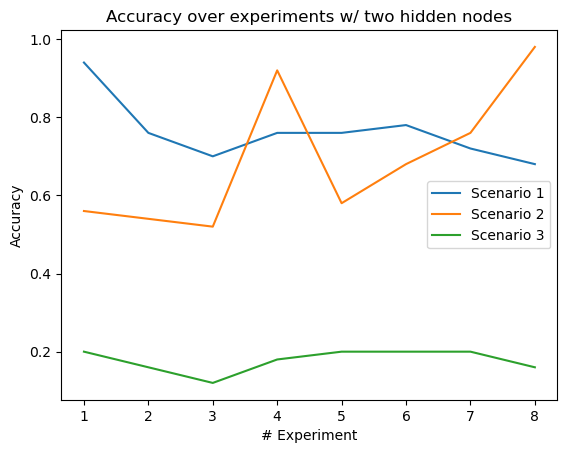

In [55]:
x_values = range(1, 9)

data_2_nodes = [[0.94, 0.56, 0.2],
        [0.76, 0.54, 0.16],
        [0.7, 0.52, 0.12],
        [0.76, 0.92, 0.18],
        [0.76, 0.58, 0.2],
        [0.78, 0.68, 0.2],
        [0.72, 0.76, 0.2],
        [0.68, 0.98, 0.16]
        ]

# Labels for each line
labels = ['Scenario 1', 'Scenario 2', 'Scenario 3']

# Create the line chart
for i in range(len(data_2_nodes[0])):
    y_values = [row[i] for row in data_2_nodes]
    plt.plot(x_values, y_values, label=labels[i])

# Add labels and legend
plt.xlabel('# Experiment')
plt.ylabel('Accuracy')
plt.title('Accuracy over experiments w/ two hidden nodes')
plt.legend()

# Show the plot
plt.show()